In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [58]:
df = pd.read_csv('data/titanic_toy.csv')

In [59]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [60]:
# let's see how much data is missing in terms of percentage
df.isnull().sum()/len(df) *100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

# so age has missing data about 19% , it is not good to apply mean/median/arbitary value (random)/End of distributuion
# but here we see , why we do not use this method and how our distribution of data is changed
- we can fill this values by pandas as well as scikit-learn
- but scikit-learn will be good for filling values to implement in piplines

In [61]:
# here we first see by pandas because to plot graphs we need data in dataframe
# but scikit-learn gives in data in 2D array

- firstly to apply any imputation we split data in train set and testing set

In [62]:
X_train,X_test,y_train,y_test = train_test_split(df[['Age','Fare']],df['Survived'],test_size=0.2)

In [63]:
X_train.sample(3)

,Age,Fare
156,16.0,7.7333
143,19.0,6.7500
488,30.0,8.0500


In [64]:
# by mean
X_train_age = X_train['Age'].fillna(X_train['Age'].mean())
X_train_fare = X_train['Fare'].fillna(X_train['Fare'].mean())

# by median
X_train_age_m = X_train['Age'].fillna(X_train['Age'].median())
X_train_fare_m = X_train['Fare'].fillna(X_train['Fare'].median())

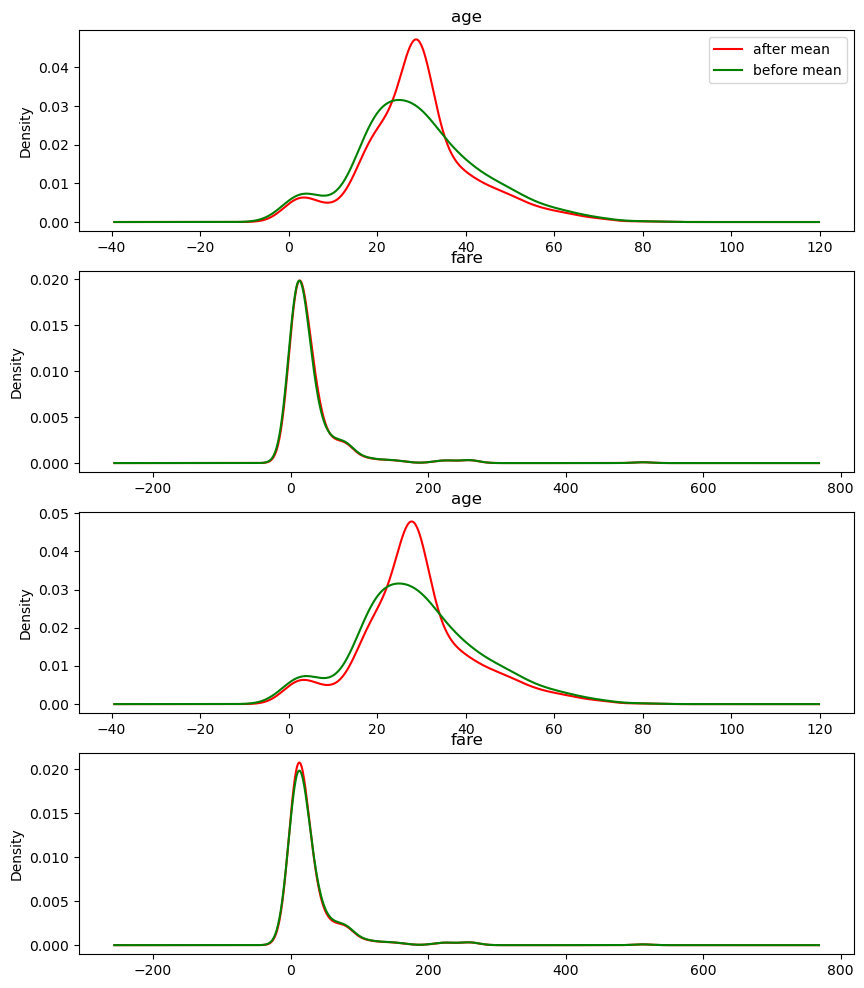

In [65]:
# now let's see distribution after and before imputation mean/mode
fig,ax = plt.subplots(4,1,figsize=(10,12))

X_train_age.plot(kind='kde',title='age',ax = ax[0],color='red',label='after mean')
X_train['Age'].plot(kind='kde',ax = ax[0],color='green',label='before mean')

X_train_fare.plot(kind='kde',ax = ax[1],color='red',label='after mean')
X_train['Fare'].plot(kind='kde',title='fare',ax = ax[1],color='green',label='before mean')

X_train_age_m.plot(kind='kde',ax = ax[2],color='red',label='after median')
X_train['Age'].plot(kind='kde',title='age',ax = ax[2],color='green',label='before median')

X_train_fare_m.plot(kind='kde',ax = ax[3],color='red',label='after mode')
X_train['Fare'].plot(kind='kde',title='fare',ax = ax[3],color='green',label='before median')

ax[0].legend()
plt.show()

In [66]:
# let's see varience before and after
print('Var before of age' ,X_train['Age'].var())
print('Var before of fare' ,X_train['Fare'].var())

print('Var after mean of age ', X_train_age.var())
print('Var after mean of Fare ',X_train_fare.var())

print('Var after median of age ', X_train_age.var())
print('Var after median of Fare ',X_train_fare.var())

# var is diff is more means our imputaion is not applicable .we have to change the method

Var before of age 201.20441981107868
Var before of fare 2460.0496328147215
Var after mean of age  161.86909723197886
Var after mean of Fare  2342.41012857323
Var after median of age  161.86909723197886
Var after median of Fare  2342.41012857323


In [67]:
# now by scikit learn
trf = SimpleImputer(strategy = 'mean')

X_train = trf.fit_transform(X_train)
X_test = trf.transform(X_test)

In [68]:
trf = SimpleImputer(strategy = 'median')

X_train = trf.fit_transform(X_train)
X_test = trf.transform(X_test)

In [83]:
X_train,X_test,y_train,y_test = train_test_split(df[['Age','Fare']],df['Survived'],test_size=0.2)
trf1 = ColumnTransformer(transformers=[
    ('trf',SimpleImputer(strategy='median'),['Age']),
    ('trf1',SimpleImputer(strategy='mean'),['Fare'])
])
X_train = trf1.fit_transform(X_train)
X_test = trf1.transform(X_test)

# arbitary value

In [84]:
X_train,X_test,y_train,y_test = train_test_split(df[['Age','Fare']],df['Survived'],test_size=0.2)
trf1 = ColumnTransformer(transformers=[
    ('trf',SimpleImputer(strategy='constant',fill_value = 1),['Age']),
    ('trf1',SimpleImputer(strategy='constant',fill_value = -1),['Fare'])
])
X_train = trf1.fit_transform(X_train)
X_test = trf1.transform(X_test)